# Dictionaries, Visualization and Basic Descriptive Statistics

## Dictionaries

While lists are always indexed by the natural numbers, we can also create collections indexed by whatever we want.  These are called dictionaries in Python, but they go by other names in other languages.  So if you are talking to programmers who work in other languages, don't be fooled if they call it something else.

They work as follows:

In [1]:
dictionary = {0:1, 1:2, 3:4, 4:5}

print(dictionary)

{0: 1, 1: 2, 3: 4, 4: 5}


Here the first value of each "pair" is the key, or index of the dictionary and the second value is just called the "value".  

Here is how we get to specific elements:

In [2]:
dictionary[0]

1

Notice that I decided to use the same index that we might find in a list.  With a dictionary we can also do this:

In [3]:
dictionary["narf"] = 6

print(dictionary)
print()
print(dictionary["narf"])

{0: 1, 1: 2, 3: 4, 4: 5, 'narf': 6}

6


As you can see, the index for a dictionary can be any of our primitives _as well as other things_.  We'll get to those later.

Additionally we can see all the keys of a dictionary at once:

In [5]:
dictionary.keys()

dict_keys([0, 1, 3, 4, 'narf'])

or all of the values:

In [6]:
dictionary.values()

dict_values([1, 2, 4, 5, 6])

One of the other differences between lists and dictionaries is how we add elements to each:

In [7]:
listing = []

dictionary = {}

listing.append(1)
dictionary[0] = 1

listing, dictionary

([1], {0: 1})

For the list we had to use something called "dot notation" to call a "method".  Whereas with a dictionary we can just update directly as part of the "syntax" of a dictionary.  We can _technically_ do this with a list as well, although it's not used as often:

In [8]:
listing += [2]

listing

[1, 2]

Here the list is updated via concatenation.  Next let's look at an application of dictionaries - word counting.

In [9]:
with open("return_of_sherlock_holmes.txt", "r") as f:
    text = f.read()
    
words = text.split()
unique_words = list(set(words))

word_counts = {}.fromkeys(unique_words, 0)
for word in unique_words:
    word_counts[word] = words.count(word)

In [17]:
counter = 0
for word in word_counts:
    print(word, word_counts[word])
    counter += 1
    if counter == 5:
        break

lives 9
eyes 75
affection 1
harassed, 1
landsmen 1


There are a few pieces that we need to explain:

In [ ]:
with open("return_of_sherlock_holmes.txt", "r") as f:
    text = f.read()

First we use the open function with the `"r"` for read, to read the text.  The `with` means that after we leave the context the file closes.  The `f.read` reads the full text into memory.

Next let's go over set:

In [ ]:
unique_words = list(set(words))

The `set` object gets all the unique occurrences in a list for example:

In [12]:
set([1,1,1,1,1])

{1}

Finally, let's look at the last piece of new code:

In [ ]:
word_counts = {}.fromkeys(unique_words, 0)

The dictionary comes equipped with `fromkeys` which automatically populates the dictionary keys with the list and the values with the second parameter - in our case zero.  For instance:

In [13]:
listing = [1,2,3,4,5]
{}.fromkeys(listing, 1)

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

## Visualization

We begin our visualization journey by looking at one of the classical visualization techniques the histogram.  We'll use the word count above to show the data:

<BarContainer object of 5 artists>

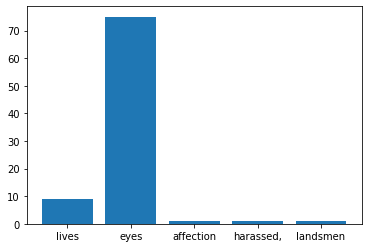

In [16]:
import matplotlib.pyplot as plt

counter = 0
x = []
y = []
for word in word_counts:
    x.append(word)
    y.append(word_counts[word])
    counter += 1
    if counter == 5:
        break
plt.bar(x, y)

The histogram breaks down into types:

* plt.bar for categorical keys like strings
* plt.hist for numerical keys like integers and floats

While we can use a histogram to visualization two dimensional data, we can also use it to get a sense of 1 dimensional data, like an array:

(array([2., 1., 0., 1., 2., 0., 1., 0., 2., 1.]),
 array([17., 25., 33., 41., 49., 57., 65., 73., 81., 89., 97.]),
 <BarContainer object of 10 artists>)

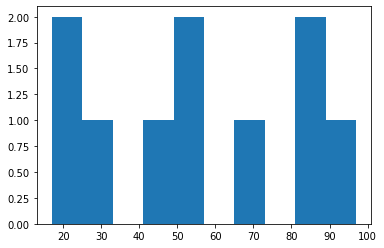

In [23]:
import numpy as np

data = np.random.randint(0, 100, size=10)

plt.hist(data)

## Descriptive Statistics

We've informally mentioned descriptive statistics up until this point, but now we'll take a more careful look at them.

We'll need the notion of a distribution.  In the real world, some experimental data - that is data that comes from a process or experiment, can follow a distribution.  In otherwords, it may be similar to a distribution.  One such distribution that data may follow is the _normal_ distribution.  If we know a process follows the normal distribution, we can simulate experiments using this distribution, instead of carrying out experiments in the real world.  For example:

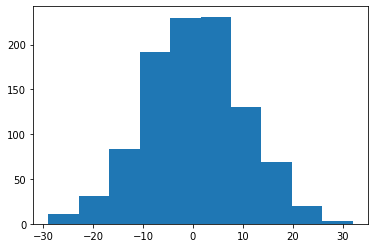

In [25]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(0, 10, size=1000)

plt.hist(data);

In order to get some information about our distribution of data, we usually start with figuring out the center of our each column in our dataset.  The central tendency of each column of our dataset has a relationship to the "expected value" of the data.  If our data is representative of the underlying population, then the central tendency is a good approxmation of what we can expect of our data over many repeated experiments from the underlying process that generated our dataset.

In [26]:
import numpy as np

arr = np.random.normal(0, 10, size=10)
arr.mean()

-3.457367060708985

The above gives us the average of ten repeated experiments.  Here the underlying data generation process is assumed to admit "normally" distributed data.  If we want the expected value we need to see how the average converges over many repeated samples from the distribution.

In [27]:
arr = np.random.normal(0, 10, size=100000000)
arr.mean()

-0.00010651267715025289

Notice that we use the same method to determined the expected value as we use to determine the average.  Unfortunately, the algorithm for the average used here only works with normally distributed data.  We'll need a broader notion of centrality to capture the expected value of any random variable.

In order to get more information about our distribution we'll ask about how spread out the data is.  This gives us a sense of the scale of the distribution of the data.  The scale or spread of the data can tell us how to compare a given data point against the entire distribution and how typical a given point is.  If a point is far away from the central tendency or expectation then it is likely atypical for the distribution.  If a point is nearby the center, it is likely much more expected.

In [28]:
arr = np.random.normal(0, 10, size=100000)
arr.std()

9.987633895501794

As we can see standard deviation also known as the spread for this random variable is around 10.  What does this mean?  Well we can start to ask questions of our data, like - how likely is it that we get a data point of 10000, given that our data is normally distributed with a mean of 0 and standard deviation of 10 and 100000 data points?

We can start by answering the question visually.

(array([0.00113125, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00113125]),
 array([-40.34387964, -40.33503984, -40.32620004, ...,  48.03646242,
         48.04530222,  48.05414202]),
 <BarContainer object of 10000 artists>)

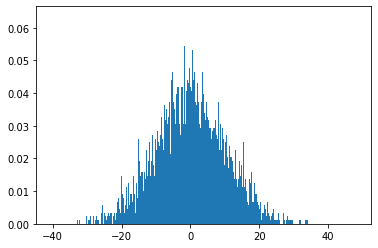

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(arr, bins=10000, density=True)

Given the scale of the distribution - which we can see on the x-axis, clearly the data point of 10000 is well outside what we'd expect for a data point, given this distribution of data.  

## Dealing with data that isn't normally distributed

What happens when our data isn't perfectly normally distributed?  Here's an example dataset that isn't exactly normally distributed:

In [30]:
from scipy.stats import skewnorm

skew_magnitude = 4
arr = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

To generate the above dataset we use a skew normal random variable, one that allows us to pass the third moment of the normal distribution directly.  Because the skew is positive, the tail of our distribution will be on the right.

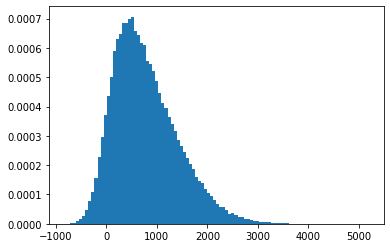

In [31]:
plt.hist(arr, bins=100, density=True)
plt.show()

How might we get a measure of center for a dataset that isn't perfectly normal?  The simple average might give us an approximation of the center:

In [32]:
arr.mean()

774.606367090484

Let's compare this with what the median produces:

In [33]:
import statistics as st

st.median(arr)

674.0781850048184

In [34]:
skew_magnitude = -4
arr2 = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

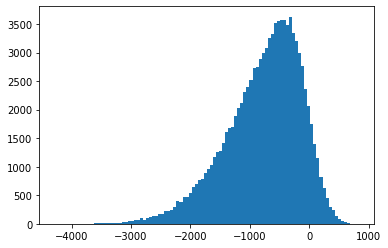

In [35]:
plt.hist(arr2, bins=100, density=False)
plt.show()

In [36]:
arr2.mean()

-772.6917694772354

In [37]:
st.median(arr2)

-671.4001320180662

As you can see here, the mean overstates the central tendency of the dataset by quite a bit!  So this tells us when our assumptions are violated we will need to make use of descriptive statistics which are robust to our assumptions needing to be relaxed



The major reason that the arithemtic mean overstates the average in this case is because of how it treats large values.  Recall the formula for the arithmetic mean:

$$ 1/N \sum_{i=0}^{i=N} X[i] $$

Where X is a list of numbers.



Because the sum treats all values equally, if you have one large number the average can shift by a lot.  

The way that robust descriptive statistics like the median get around this is by looking at the rank of the data.  Here's how this works:

First the data is sorted into ascending order and then different sorted elements are used as alternative measures for centrality and spread.  While not perfectly robust, they do well with a lot of different distributions that are approximately normal but exhibiting some non-normal tendencies either by a non zero skew or a non zero kurtosis.

In [38]:
def interquartile_range(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    return q3 - q1

print("Median", np.percentile(arr, 50))
print("Interquartile Range", interquartile_range(arr))
print("Mean", arr.mean())
print("Standard Deviation", arr.std())

Median 674.0781850048184
Interquartile Range 847.6924433308365
Mean 774.606367090484
Standard Deviation 635.6782246402964


As you can see, the above robust statistics capture the same information - the center and the spread of the distribution, except because these are rank order statistics, they won't capture any information from the outliers.  This is because they only look at sorted order, these statistics are unaware of bias via outliers.

Another important robust descriptive statistic is the [trimean](https://en.wikipedia.org/wiki/Trimean).

In [39]:
def trimean(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    median = np.percentile(arr, 50)
    return (q1 + 2*median + q3)/4

print("Trimean", trimean(arr))

Trimean 701.5362669021401


"An advantage of the trimean as a measure of the center (of a distribution) is that it combines the median's emphasis on center values with the midhinge's attention to the extremes."

— Herbert F. Weisberg, Central Tendency and Variability